In [ ]:
# Commande pour l'export en slides ne contenant pas le code python

#  jupyter nbconvert TreesForests.ipynb --to slides --no-input --no-prompt

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import drawSvg as draw

In [2]:
heart_df = pd.read_csv("data/heart.csv")
heart_data=heart_df.drop('target',axis=1)
heart_target=heart_df['target']
X_train, X_test, y_train, y_test = train_test_split(heart_data, heart_target, random_state=0)

In [3]:
breast_df = pd.read_csv("data/breast.csv")
breast_data=breast_df.drop(['id','diagnosis','Unnamed: 32'],axis=1)
breast_target=breast_df['diagnosis']=='M'
X_train, X_test, y_train, y_test = train_test_split(breast_data, breast_target, random_state=0)

In [4]:
diabetes_df = pd.read_csv("data/diabetes.csv")
diabetes_data=diabetes_df.drop('Outcome',axis=1)
diabetes_target=diabetes_df['Outcome']
#X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target, random_state=0)

# Arbres de décision, forêts aléatoires


Etienne Birmelé, janvier 2021

## Cadre de l'apprentissage supervisé


* On considère des variables explicatives $(X_1,\ldots,X_p) \in \mathcal{X}$ et une variable de sortie $Y\in \mathcal{Y}$

* On dispose d'un $n$-échantillon d'observations de $X$ et $Y$

L'apprentissage supervisé consiste à définir la meilleure règle de prédiction $R: \mathcal{X} \to \mathcal{Y}$ au vu de cet échantillon parmi un ensemble $\mathcal{R}$.

Un nouvel individu pour lequel $Y$ n'est pas mesuré se verra alors affecter la prédiction $\hat{Y}=R(X)$.


* Questions à traiter pour mettre en place une méthode

a. Quel est l'ensemble $\mathcal{R}$ considéré?

b. Que veut dire être le meilleur ? $\to$ définition d'un critère à optimiser

c. Résoudre le problème d'optimisation associé

## Jeu de données jouet

* Jeu disponible sur Kaggle https://www.kaggle.com/uciml/breast-cancer-wisconsin-data  
* $X$: $30$ variables géométriques concernant les noyaux cellulaires sont extraites d'images de tumeurs.  


In [5]:
breast_data.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

* $Y$: variable binaire disant si la tumeur est maligne ou bénigne

## Arbre de décision


* Règle de décision séquentielle, présentée sous forme d'un arbre. Chaque non-feuille représente une décision à 
prendre en fonction d'une des variables, chaque feuille représente une prédiction







* Pour prédire $\hat{Y}=R(X)$, on démarre de la racine et on suit les décision séquentielles jusqu'à atteindre une feuille.














In [6]:
d = draw.Drawing(400, 200, origin='center', displayInline=False)

# Draw a rectangle
r1 = draw.Rectangle(-20,80,40,20,fill='none',stroke='black')
d.append(r1)

r21 = draw.Rectangle(-100,30,40,20,fill='none',stroke='black')
d.append(r21)

r22 = draw.Rectangle(60,30,40,20, fill='none', stroke='black')
d.append(r22)

r31 = draw.Rectangle(-140,-20,40,20, fill='none', stroke='black')
d.append(r31)

r32 = draw.Rectangle(-60,-20,40,20, fill='none', stroke='black')
d.append(r32)

r33 = draw.Rectangle(20,-20,40,20, fill='none', stroke='black')
d.append(r33)

r34 = draw.Rectangle(100,-20,40,20, fill='none', stroke='black')
d.append(r34)

r41 = draw.Rectangle(-20,-70,40,20, fill='none', stroke='black')
d.append(r41)

r42 = draw.Rectangle(60,-70,40,20, fill='none', stroke='black')
d.append(r42)

# Draw an irregular polygon
d.append(draw.Lines(-20,80,-80,50,stroke='black'))
d.append(draw.Lines(20,80,80,50,stroke='black'))
d.append(draw.Lines(-100,30,-120,0,stroke='black'))
d.append(draw.Lines(-60,30,-40,0,stroke='black'))
d.append(draw.Lines(100,30,120,0,stroke='black'))
d.append(draw.Lines(60,30,40,0,stroke='black'))
d.append(draw.Lines(20,-20,0,-50,stroke='black'))
d.append(draw.Lines(60,-20,80,-50,stroke='black'))


d.append(draw.Text('X1<=s1',10,-90,65, fill='black'))
d.append(draw.Text('X1>s1',10,60,65, fill='black'))
d.append(draw.Text('X2<=s2',10,-150,15, fill='black'))
d.append(draw.Text('X2>s2',10,-50,15, fill='black'))
d.append(draw.Text('X3<=s3',10,10,15, fill='black'))
d.append(draw.Text('X3>s3',10,110,15, fill='black'))
d.append(draw.Text('X2<=s4',10,-30,-35, fill='black'))
d.append(draw.Text('X2>s4',10,70,-35, fill='black'))

d.setPixelScale(2)  # Set number of pixels per geometry unit


## Partition de $\mathcal{X}$


Un arbre de décision revient à partitionner $\mathcal{X}$ en *pavés* et à définir une fonction de prédiction constante par pavé.





In [7]:
d = draw.Drawing(400, 200, origin='center', displayInline=False)

r1 = draw.Rectangle(-110,40,20,10,fill='none',stroke='black')
d.append(r1)

r21 = draw.Rectangle(-150,15,20,10,fill='none',stroke='black')
d.append(r21)

r22 = draw.Rectangle(-70,15,20,10, fill='none', stroke='black')
d.append(r22)

r31 = draw.Rectangle(-130,-10,20,10, fill='none', stroke='black')
d.append(r31)

r32 = draw.Rectangle(-170,-10,20,10, fill='none', stroke='black')
d.append(r32)

r33 = draw.Rectangle(-90,-10,20,10, fill='none', stroke='black')
d.append(r33)

r34 = draw.Rectangle(-50,-10,20,10, fill='none', stroke='black')
d.append(r34)

r41 = draw.Rectangle(-110,-35,20,10, fill='none', stroke='black')
d.append(r41)

r42 = draw.Rectangle(-70,-35,20,10, fill='none', stroke='black')
d.append(r42)

# Draw an irregular polygon
d.append(draw.Lines(-110,40,-140,25,stroke='black'))
d.append(draw.Lines(-90,40,-60,25,stroke='black'))
d.append(draw.Lines(-150,15,-160,0,stroke='black'))
d.append(draw.Lines(-130,15,-120,0,stroke='black'))
d.append(draw.Lines(-50,15,-40,0,stroke='black'))
d.append(draw.Lines(-70,15,-80,0,stroke='black'))
d.append(draw.Lines(-90,-10,-100,-25,stroke='black'))
d.append(draw.Lines(-70,-10,-60,-25,stroke='black'))


d.append(draw.Text('X1<=s1',5,-145,33, fill='black'))
d.append(draw.Text('X1>s1',5,-70,33, fill='black'))
d.append(draw.Text('X2<=s2',5,-175,8, fill='black'))
d.append(draw.Text('X2>s2',5,-125,8, fill='black'))
d.append(draw.Text('X2<=s3',5,-95,8, fill='black'))
d.append(draw.Text('X2>s3',5,-45,8, fill='black'))
d.append(draw.Text('X1<=s4',5,-115,-18, fill='black'))
d.append(draw.Text('X1>s4',5,-65,-18, fill='black'))
d.append(draw.Text('Y=0',5,-164,-7, fill='red'))
d.append(draw.Text('Y=1',5,-124,-7, fill='blue'))
d.append(draw.Text('Y=1',5,-104,-32, fill='blue'))
d.append(draw.Text('Y=0',5,-64,-32, fill='red'))
d.append(draw.Text('Y=0',5,-44,-7, fill='red'))


# Draw an irregular polygon
d.append(draw.Lines(100,-80,100,80,stroke='black'))
d.append(draw.Lines(20,40,100,40,stroke='black'))
d.append(draw.Lines(100,-10,180,-10,stroke='black'))
d.append(draw.Lines(130,-10,130,-80,stroke='black'))
#d.append(draw.Lines(-20,-30,-20,-100,stroke='black'))
#d.append(draw.Lines(-200,80,-60,80,stroke='black'))
#d.append(draw.Lines(-60,10,20,10,stroke='black'))
d.append(draw.Text('Y=0',5,50,-7, fill='red'))
d.append(draw.Text('Y=1',5,50,65, fill='blue'))
d.append(draw.Text('Y=1',5,110,-50, fill='blue'))
d.append(draw.Text('Y=0',5,150,-50, fill='red'))
d.append(draw.Text('Y=0',5,140,30, fill='red'))



d.setPixelScale(2)  # Set number of pixels per geometry unit


##  Apprentissage de la règle

* De façon séquentielle à partir de la racine

* Pour un noeud donné, on note $A$ l'ensemble des individus de l'ensmble d'apprentissage qui sont classés dans ce noeud. 

   1. Si le noeud est *pur*, c'est-à-dire que $Y$ est constant sur $A$, le noeud reste une feuille.
   
   2. Sinon, on cherche une variable $X_i$ et un seuil $s$ tel que la partition 
\begin{equation}
A = \{ j\in A| X_i(j) \leq s \}  \cup \{ j\in A| X_i(j)>s \}
\end{equation}
est la meilleure.

   3. On continue jusqu'à n'avoir que des noeuds purs ou rencontrer un critère d'arrêt prédéfini. Les prédictions des feuilles sont définies par vote majoritaire ($Y$ catégoriel) ou moyenne ($Y$ continu). 
      

## Choix de la meilleure partition  - option minimisation du risque

Le **risque** lié à l'arbre et à l'échantillon d'apprentissage est par exemple
$$ r(T) = \sum_{j=1}^n  (\hat{Y} - Y)^2 $$


 On minimise le risque lié à l'arbre déjà construit auquel on ajoute les deux nouveaux noeuds








*Remarque dans le cas de la classification:*  Considérons un problème à deux classes et une répartition $70/30$ dans le noeud père.

Une première partition donne deux noeuds fils de répartitions $55/45$ et $100/0$. 

Une deuxième des noeuds de répartitions $70/30$ et $70/30$.

Le critère du risque ne fait pas la différence entre les deux partitions, alors que la première solution est 
plus intéressante.


## Choix de la meilleure partition - option de l'impureté

On considère $Y$ catégoriel à $K$ classes, et on note pour un $p_k(A)$ la proportion des individus du noeuds de classe $k$.

On définit l'indice d'impureté $I$ d'un noeud:

*    **Indice d'impureté de Gini**  $I(A)= \sum_k p_k(1-p_k)$
    
*    **Indice d'impureté de l'entropie**  $I(A) = - \sum_k p_k \log p_k$
        


En notant $A_1$ et $A_2$ les populations des deux noeud fils, on choisit de maximiser la perte d'impureté
$$I(A)-\frac{|A_1|}{|A_1|+|A_2|}I(A_1) - \frac{|A_2|}{|A_1|+|A_2|}I(A_2)$$



*Remarque:* si $Y$ est continu, on peut définir l'impureté à partir de la variance mais le critère du risque est en général préféré.


## Petit aparté sur le sur-apprentissage et la validation croisée

In [8]:
max_depth=8
train_accuracy=np.zeros(max_depth)
test_accuracy=np.zeros(max_depth)
train_error=np.zeros(max_depth)
test_error=np.zeros(max_depth)

for i in range(max_depth):
    clf = DecisionTreeClassifier(max_depth=i+1)
    clf.fit(X_train,y_train)
    train_accuracy[i]=clf.score(X_train,y_train)
    test_accuracy[i]=clf.score(X_test,y_test)
    train_error[i]=np.mean((clf.predict_proba(X_train)[:,1]-y_train)**2)
    test_error[i]=np.mean((clf.predict_proba(X_test)[:,1]-y_test)**2)
    


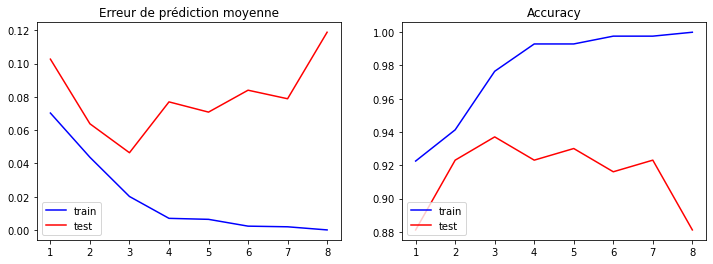

In [9]:
fig = plt.figure(figsize=(12,4))
x = np.linspace(1,max_depth,max_depth)

fig.add_subplot(1,2,1)
plt.plot(x, train_error,color='blue',label='train')
plt.plot(x, test_error,color='red',label='test')
#plt.ylim((-0.05,1.05))
plt.title("Erreur de prédiction moyenne")
plt.legend(loc='lower left')

fig.add_subplot(1,2,2)
plt.plot(x, train_accuracy,color='blue',label='train')
plt.plot(x, test_accuracy,color='red',label='test')
#plt.ylim((-0.05,1.05))         
plt.title("Accuracy")
plt.legend(loc='lower left')

#fig.savefig()

### Sur-apprentissage

* Trop complexifier une méthode pour coller aux données d'apprentissage risque de lui faire perdre en potentiel de généralisation. 

* On isole par exemple $1/4$ des données choisies au hasard dans un **jeu test**, et on apprend des règles sur les $3/4$ restants, appelés **jeu d'apprentissage**. 

* L'évolution du critère sur le jeu test indique le début du sur-apprentissage

Exemple en complexifiant via la profondeur des arbres:



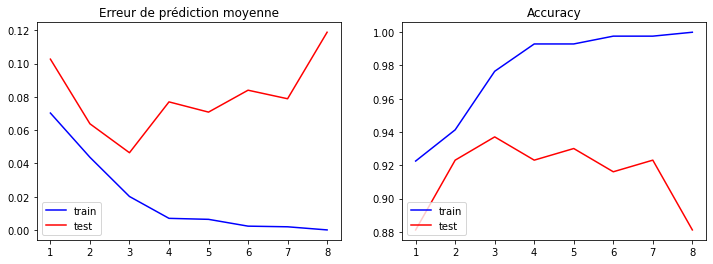

In [10]:
fig

Sur le jeu d'apprentissage, le résultat s'améliore (logique car les ensembles $\mathcal{F}$ correspondants sont emboîtés). Sur le jeu test, on voit apparaître le moment où les règles apprises deviennent contre-productives pour une généralisation.

### Règle d'or




Ne jamais évaluer une règle d'apprentissage sur les données qui ont servi à l'apprendre





### Validation croisée


* En cas de comparaison de méthodes différentes ou de choix d'un paramètre à régler (profondeur de l'arbre), on 
veut ne pas accumuler la mise de côté de donner pour tester en respectant la règle d'or.

* La validation croisée (CV) consiste à découper aléatoirement le jeu d'apprentissage en **folds** $(f_1,\ldots ,f_K)$ et à récupérer une prédiction par règle considérée et par individu en respectant la règle d'or:

 pour chaque $i$, on apprend la règle sur toutes les folds sauf $f_i$ et on l'utilise pour prédire sur $f_i$










In [11]:
d = draw.Drawing(300, 200, origin='center', displayInline=False)

# Draw a rectangle
r1 = draw.Rectangle(-60,0,120,50,fill='none',stroke='black')
d.append(r1)

# Draw a rectangle
r2 = draw.Rectangle(80,0,40,50,fill='none',stroke='gray')
d.append(r2)

r3 = draw.Rectangle(-40,0,100,50,fill='black', fill_opacity=.3, stroke='black')
d.append(r3)

# Draw an irregular polygon
d.append(draw.Lines(-40,0,-40,50,stroke='black'))
d.append(draw.Lines(-20,0,-20,50,stroke='black'))
d.append(draw.Lines(0,0,0,50,stroke='black'))
d.append(draw.Lines(20,0,20,50,stroke='black'))
d.append(draw.Lines(40,0,40,50,stroke='black'))


d.append(draw.Text('test',10,90,30, fill='gray'))
d.append(draw.Text('f1',10,-55,30, fill='black'))
d.append(draw.Text('f2',10,-35,30, fill='black'))
d.append(draw.Text('f3',10,-15,30, fill='black'))
d.append(draw.Text('f4',10,5,30, fill='black'))
d.append(draw.Text('f5',10,25,30, fill='black'))
d.append(draw.Text('f6',10,45,30, fill='black'))

d.setPixelScale(2)  # Set number of pixels per geometry unit




### Validation croisée


* On a appris $K$ règles différentes, mais cela permet de comparer les risques pour différentes méthodes ou valeurs des paramètres: on choisit la méthode retenue à l'aide de l'erreur de validation croisée et on l'apprend sur tout l'ensemble d'apprentissage


In [12]:
d = draw.Drawing(450, 200, origin='center', displayInline=False)


d.append(draw.Text('CV',10, -120, 30))


# Draw upper left
r1 = draw.Rectangle(-60,0,120,50,fill='none',stroke='black')
d.append(r1)

r2 = draw.Rectangle(-40,0,100,50,fill='black', fill_opacity=.3, stroke='black')
d.append(r2)

d.append(draw.Lines(-40,0,-40,50,stroke='black'))
d.append(draw.Lines(-20,0,-20,50,stroke='black'))
d.append(draw.Lines(0,0,0,50,stroke='black'))
d.append(draw.Lines(20,0,20,50,stroke='black'))
d.append(draw.Lines(40,0,40,50,stroke='black'))

d.append(draw.Text('f1',10,-55,30, fill='black'))
d.append(draw.Text('f2',10,-35,30, fill='black'))
d.append(draw.Text('f3',10,-15,30, fill='black'))
d.append(draw.Text('f4',10,5,30, fill='black'))
d.append(draw.Text('f5',10,25,30, fill='black'))
d.append(draw.Text('f6',10,45,30, fill='black'))


d.append(draw.Text('...',10, 75, 30))


# Draw upper right
r3 = draw.Rectangle(100,0,120,50,fill='none',stroke='black')
d.append(r3)

r4 = draw.Rectangle(100,0,100,50,fill='black', fill_opacity=.3, stroke='black')
d.append(r4)

d.append(draw.Lines(120,0,120,50,stroke='black'))
d.append(draw.Lines(140,0,140,50,stroke='black'))
d.append(draw.Lines(160,0,160,50,stroke='black'))
d.append(draw.Lines(180,0,180,50,stroke='black'))
d.append(draw.Lines(200,0,200,50,stroke='black'))

d.append(draw.Text('f1',10,105,30, fill='black'))
d.append(draw.Text('f2',10,125,30, fill='black'))
d.append(draw.Text('f3',10,145,30, fill='black'))
d.append(draw.Text('f4',10,165,30, fill='black'))
d.append(draw.Text('f5',10,185,30, fill='black'))
d.append(draw.Text('f6',10,205,30, fill='black'))








# Draw bottom

d.append(draw.Text('Règle finale',10, -120, -50))

r5 = draw.Rectangle(-20,-80,120,50,fill='black', fill_opacity=.3,stroke='black')
d.append(r5)

r6 = draw.Rectangle(120,-80,40,50,fill='none',stroke='black')
d.append(r6)





d.append(draw.Text('test',10,130,-50, fill='black'))
d.append(draw.Text('apprentissage',10,0,-50, fill='black'))




d.setPixelScale(2)  # Set number of pixels per geometry unit


# Display in Jupyter notebook
d.rasterize()  # Display as PNG
d  # Display as SVG


## Retour aux arbres de décision

Un arbre de décision trop développé est sujet au sur-aprentissage: il faut définir un critère d'**élagage**, à fixer par exemple par validation croisée

In [13]:
#creation d'un vecteur avec les scores par 
depth_score = [.65]
for i in range(1,12):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring="roc_auc")
    depth_score.append(scores.mean())
chosen_depth=np.argmax(depth_score)

clf = DecisionTreeClassifier(max_depth=chosen_depth)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

Text(0.5, 1.0, 'Arbre final')

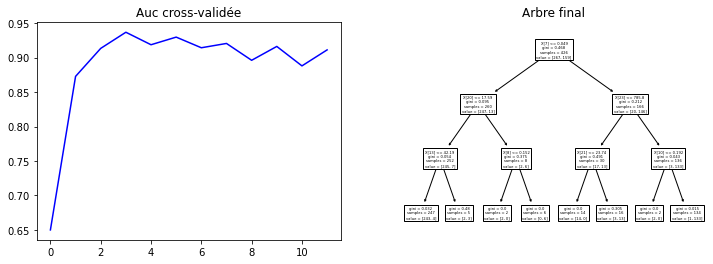

In [14]:
fig = plt.figure(figsize=(12,4))
x = np.linspace(0,len(depth_score)-1,len(depth_score))

fig.add_subplot(1,2,1)
plt.plot(x, depth_score,color='blue')
plt.title("Auc cross-validée")

fig.add_subplot(1,2,2)
tree.plot_tree(clf)
plt.title("Arbre final")

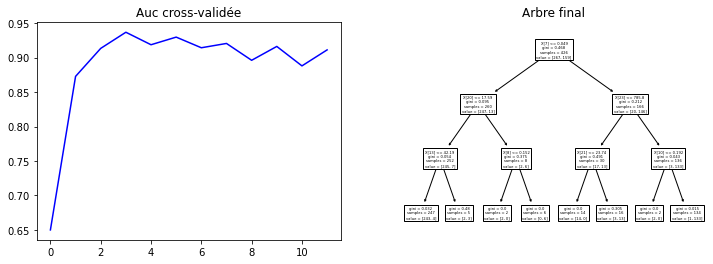

In [15]:
fig

On peut l'utiliser pour effectuer des prédictions sur de nouveaux individus, ici ceux de l'échantillon test.

In [17]:
clf.predict(X_test)

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False,

Dans les cas de l'échantillon test, on peut avoir une matrice de confusion donnant une idée de la qualité des prédictions (vérité en ligne, prédiction en colonne)

In [18]:
mc=pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test)))
mc.head()

0   1
0  79  11
1   1  52

## Forêts aléatoires

### Bagging


* il peut être intéressant de faire collaborer plusieurs règles d'apprentissage pour obtenir une plus grande stabilité (problème majeur de certains algorithmes dont CART)

* réunir leurs prédictions peut se faire par exemple par moyenne ou vote majoritaire

* un ensemble d'arbres est une ... forêt. L'idée des forêts aléatoires est d'avoir un grand nombre d'arbres de décision individuellement imprécis mais collectivement meilleurs qu'un arbre optimisé





### Comment générer des arbres différents?


* Aléa sur les individus en utilisant un échantillon bootstrap par arbre 



* Aléa sur les variables en ne sélectionnant qu'une fraction des variables (typiquement $\sqrt{d}$) à chaque noeud



**Remarque:** Le bootstrap implique que chaque individu nest pas sélectionné dans une fraction $\frac{1}{e}$ des arbres et que la qualité de la forêt formé par ces arbres peut être évalué pour lui. On parle d'**erreur out-of-bag**, qui est une alternative à l'erreur cross-validée. 





In [19]:
#creation d'un vecteur avec les scores par 
depth_score = [.65]
for i in range(1,12):
    clf = RandomForestClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, scoring="roc_auc")
    depth_score.append(scores.mean())
chosen_depth=np.argmax(depth_score)

clf = RandomForestClassifier(max_depth=chosen_depth)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

Text(0.5, 1.0, 'Auc cross-validée en fonction de la profondeur max')

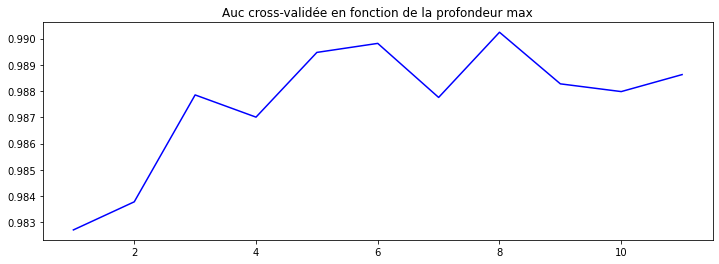

In [20]:
fig = plt.figure(figsize=(12,4))
x = np.linspace(1,len(depth_score)-1,len(depth_score)-1)
depth_score.pop(0)

plt.plot(x, depth_score,color='blue')
plt.title("Auc cross-validée en fonction de la profondeur max")


Profondeur retenue

In [21]:
chosen_depth

8

Prédictions sur l'ensemble test

In [22]:
clf.predict(X_test)

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,

et matrice de confusion  (vérité en ligne, prédiction en colonne)

In [23]:
mc=pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test)))
mc.head()

0   1
0  88   2
1   2  51



* Gain en performance et en stabilité par rapport à un arbre seul

* Perte en interprétabilité

* Possibilité d'ordonner les variables: l'importance dune variable est donnée par la perte moyenne des performances Out-Of-Bag si on permute aléatoirement la variable d'intérêt